# Sequential Parameter Optimization
## Using `sklearn` Surrogates

* This notebook explains how different surrogate models from `scikit-learn` can be used as surrogates in `spotPython` optimization runs.

In [1]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

## 1 Example: Branin Function with `spotPython`'s Internal Kriging Surrogate

### The Objective Function Branin

* The `spotPython` package provides several classes of objective functions.
* We will use an analytical objective function, i.e., a function that can be described by a (closed) formula.
* Here we will use the Branin function:

        y = a * (x2 - b * x1**2 + c * x1 - r) ** 2 + s * (1 - t) * np.cos(x1) + s,
        where values of a, b, c, r, s and t are: a = 1, b = 5.1 / (4*pi**2),
        c = 5 / pi, r = 6, s = 10 and t = 1 / (8*pi).

* It has three global minima:


        f(x) = 0.397887 at (-pi, 12.275), (pi, 2.275), and (9.42478, 2.475).


In [2]:
from spotPython.fun.objectivefunctions import analytical
lower = np.array([-5,-0])
upper = np.array([10,15])

In [3]:
fun = analytical().fun_branin

### Running the surrogate model based optimizer `Spot`:

In [4]:
spot_2 = spot.Spot(fun=fun,
                   lower = lower,
                   upper = upper,
                   fun_evals = 20,
                   max_time = inf,
                   seed=123,
                   design_control={"init_size": 10})

In [5]:
spot_2.run()

### Print the Results

In [6]:
spot_2.print_results()

min y: 0.3982295132785083
x0: 3.135528626303215
x1: 2.2926027772585886


[['x0', 3.135528626303215], ['x1', 2.2926027772585886]]

### Show the Progress and the Surrogate

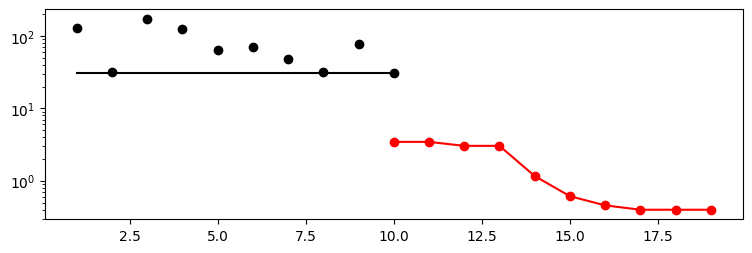

In [7]:
spot_2.plot_progress(log_y=True)

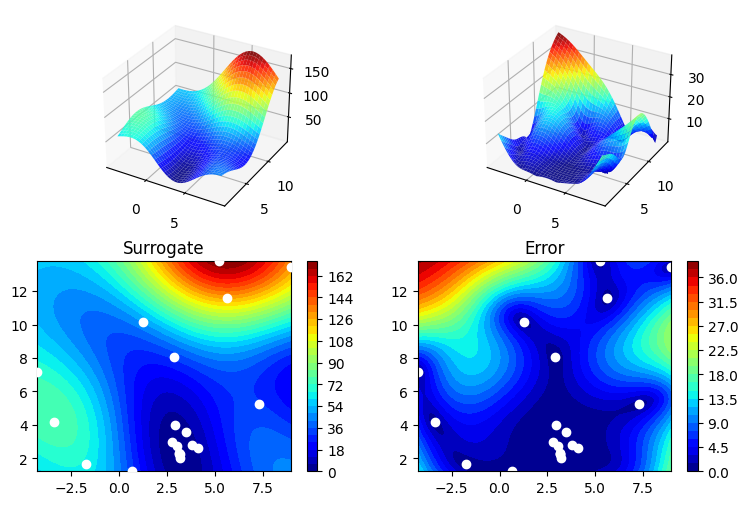

In [8]:
spot_2.surrogate.plot()

## 2 Example: Using Surrogates From scikit-learn

* Default is the `spotPython` (i.e., the internal) `kriging` surrogate.
* It can be called explicitely and passed to `Spot`.

In [9]:
from spotPython.build.kriging import Kriging
S_0 = Kriging(name='kriging', seed=123)

* Alternatively, models from `scikit-learn` can be selected, e.g., Gaussian Process, RBFs, Regression Trees, etc.

In [10]:
# Needed for the sklearn surrogates:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import tree
import pandas as pd

* Here are some additional models that might be useful later:

In [11]:
S_Tree = DecisionTreeRegressor(random_state=0)
S_LM = linear_model.LinearRegression()
S_Ridge = linear_model.Ridge()
S_RF = RandomForestRegressor(max_depth=2, random_state=0)

### GaussianProcessRegressor as a Surrogate

* To use a Gaussian Process model from `sklearn`, that is similar to `spotPython`'s `Kriging`, we can proceed as follows:

In [12]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
S_GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

* The scikit-learn GP model `S_GP` is selected for `Spot` as follows: 

    `surrogate = S_GP`

* We can check the kind of surogate model with the command `isinstance`:

In [13]:
isinstance(S_GP, GaussianProcessRegressor)
 

True

In [14]:
isinstance(S_0, Kriging)

True

* Similar to the `Spot` run with the internal `Kriging` model, we can call the run with the `scikit-learn` surrogate:

In [15]:
fun = analytical(seed=123).fun_branin
spot_2_GP = spot.Spot(fun=fun,
                   lower = lower,
                   upper = upper,
                   fun_evals = 20,
                   seed=123,
                   design_control={"init_size": 10},
                   surrogate = S_GP)
spot_2_GP.run()

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_

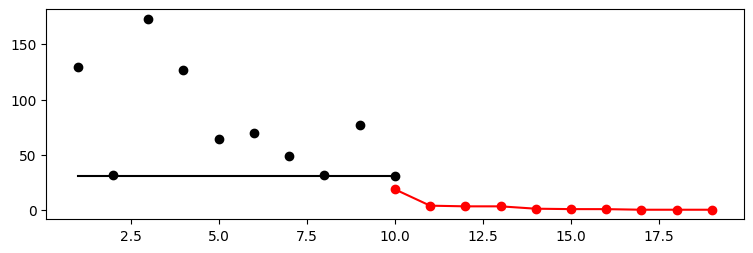

In [16]:
spot_2_GP.plot_progress()

In [17]:
spot_2_GP.print_results()

min y: 0.39824363335600843
x0: 3.1497725338565252
x1: 2.274548662743028


[['x0', 3.1497725338565252], ['x1', 2.274548662743028]]

# 3 Example: One-dimensional Sphere Function With `spotPython`'s Kriging

* In this example, we will use an one-dimensional function, which allows us to visualize the optimization process.
  * `show_models= True` is added to the argument list.

In [18]:
from spotPython.fun.objectivefunctions import analytical
lower = np.array([-1])
upper = np.array([1])
fun = analytical(seed=123).fun_sphere

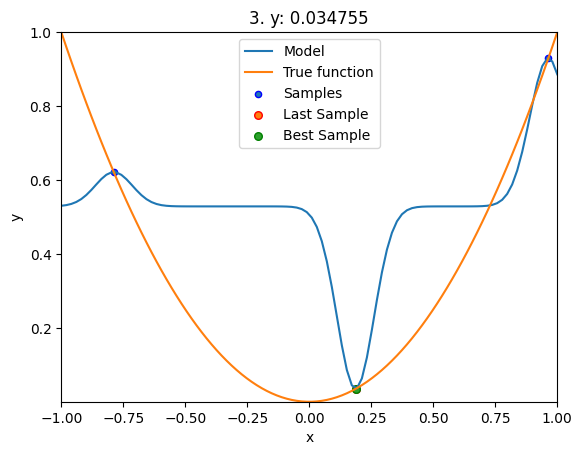

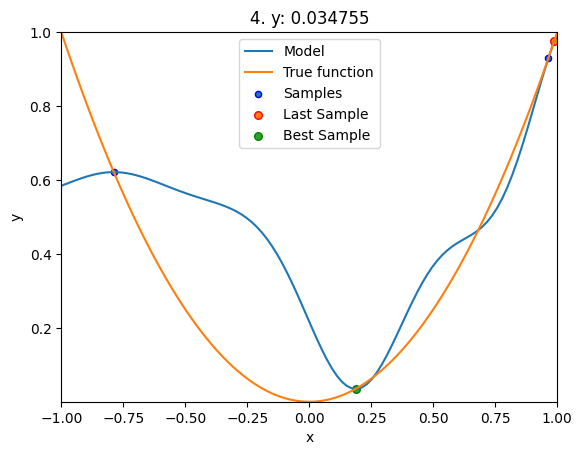

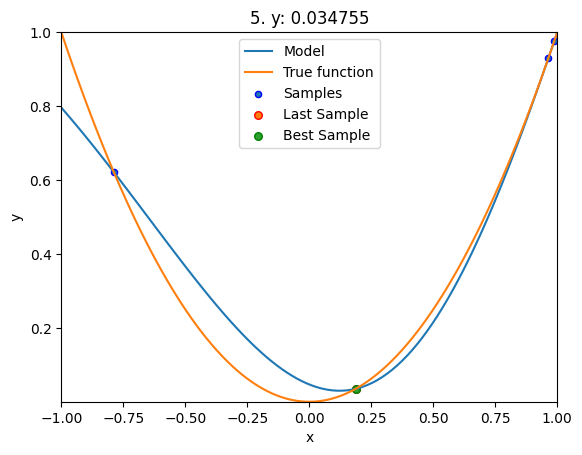

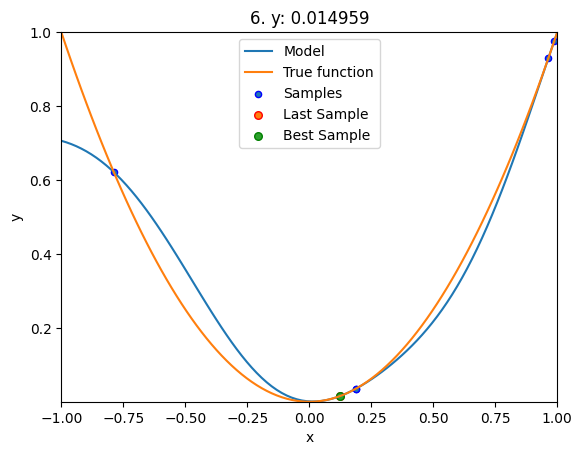

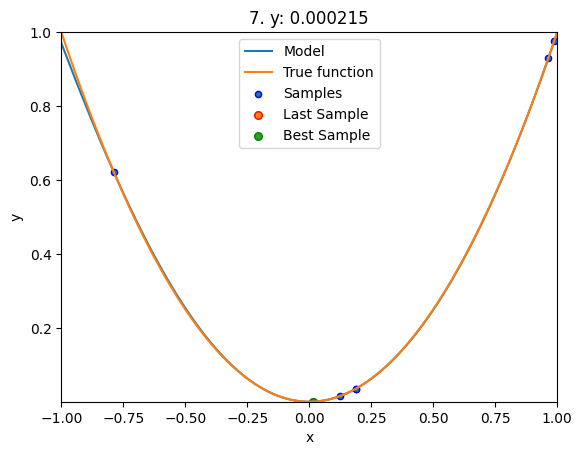

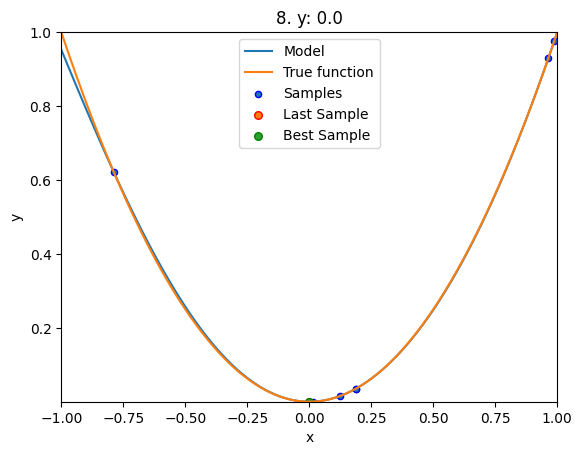

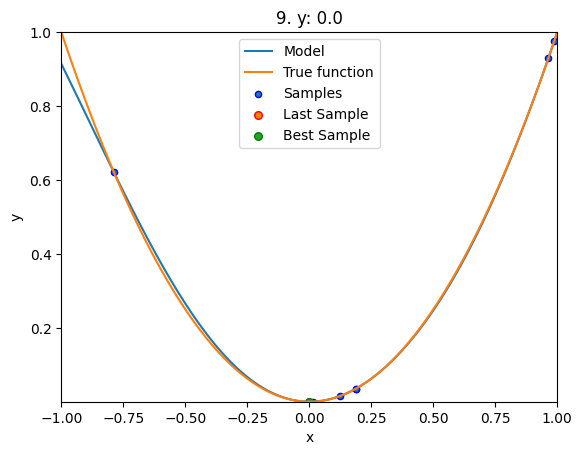

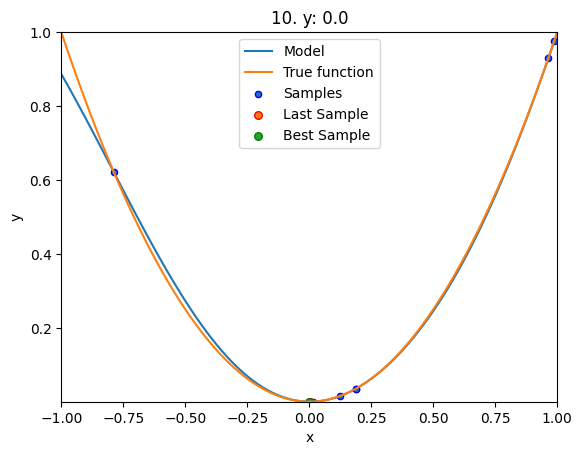

In [19]:
spot_1 = spot.Spot(fun=fun,
                   lower = lower,
                   upper = upper,
                   fun_evals = 10,
                   max_time = inf,
                   seed=123,
                   show_models= True,
                   tolerance_x = np.sqrt(np.spacing(1)),
                   design_control={"init_size": 3},)
spot_1.run()

### Results

In [20]:
spot_1.print_results()

min y: 4.41925228274096e-08
x0: -0.00021022017702259125


[['x0', -0.00021022017702259125]]

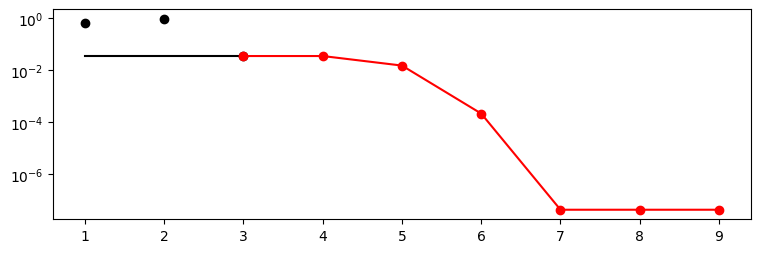

In [21]:
spot_1.plot_progress(log_y=True)

* The method `plot_model` plots the final surrogate:

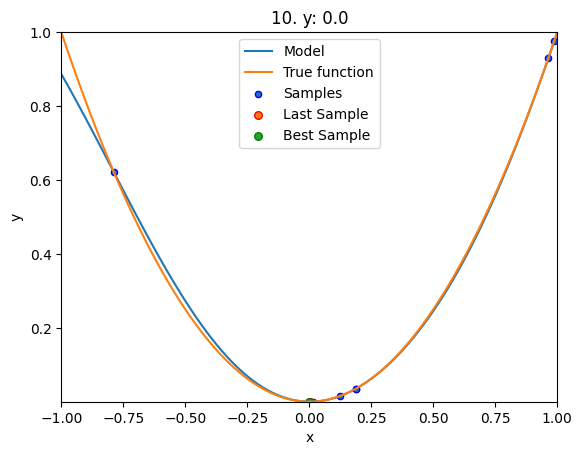

In [22]:
spot_1.plot_model()

## 4 Example: `Sklearn` Model GaussianProcess

* This example visualizes the search process on the `GaussianProcessRegression` surrogate from `sklearn`.
* Therefore `surrogate = S_GP` is added to the argument list.

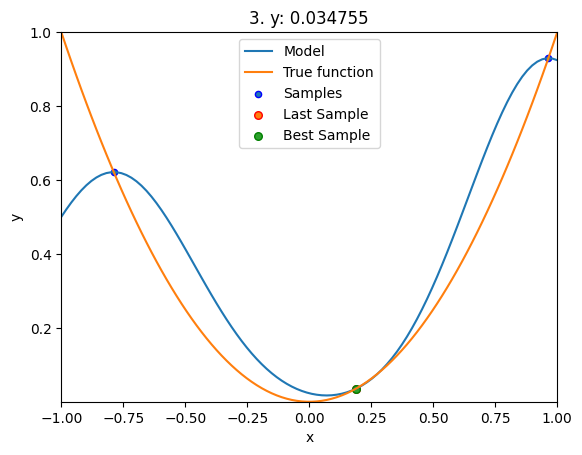

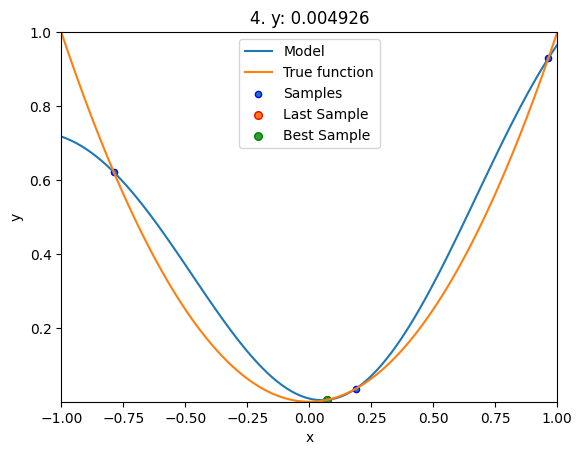

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


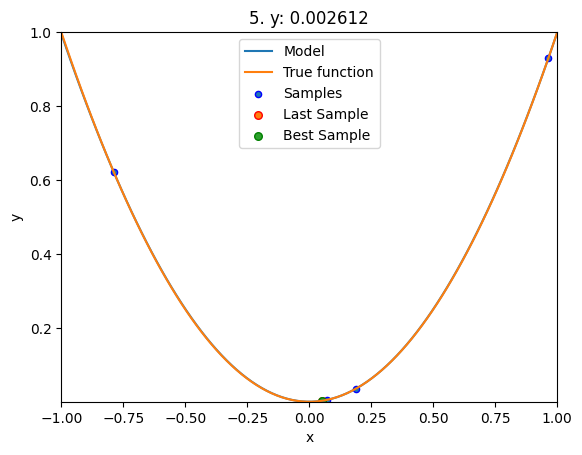

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


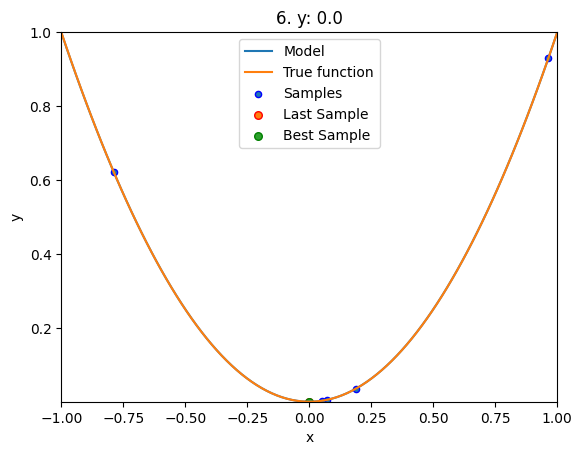

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


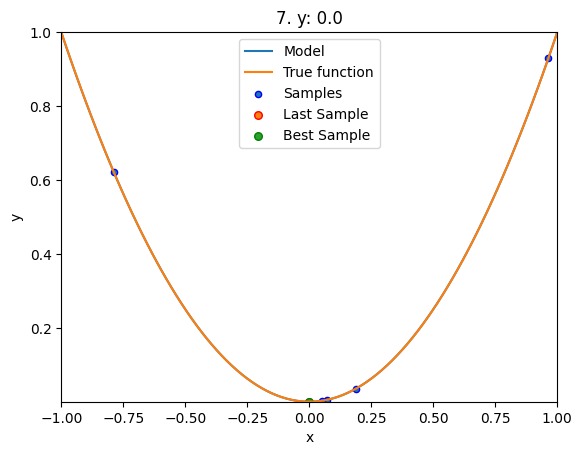

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


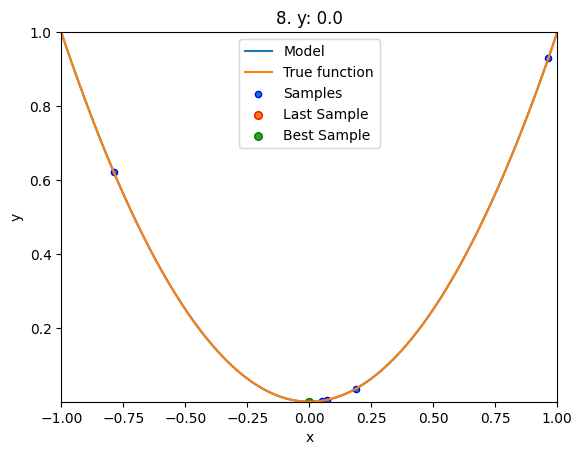

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


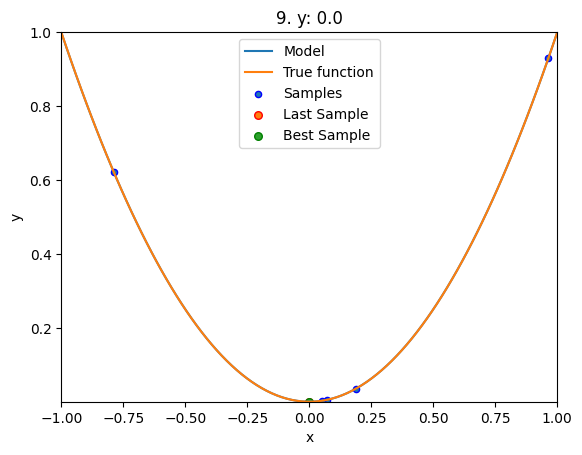

/Users/bartz/miniforge3/envs/spotCondaEnv/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


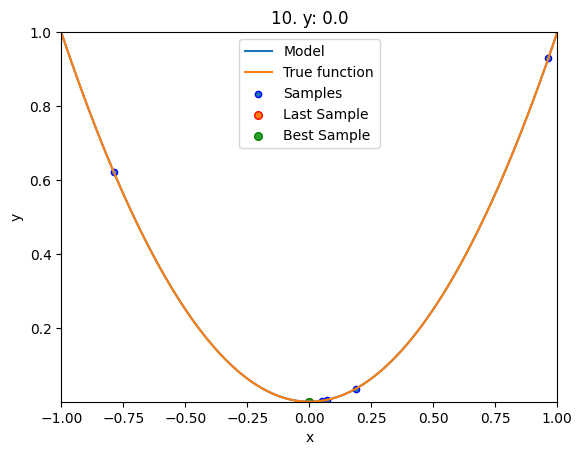

In [23]:
fun = analytical(seed=123).fun_sphere
spot_1_GP = spot.Spot(fun=fun,
                   lower = lower,
                   upper = upper,
                   fun_evals = 10,
                   max_time = inf,
                   seed=123,
                   show_models= True,
                   design_control={"init_size": 3},
                   surrogate = S_GP)
spot_1_GP.run()

In [24]:
spot_1_GP.print_results()

min y: 3.465141841503209e-09
x0: 5.8865455417445034e-05


[['x0', 5.8865455417445034e-05]]

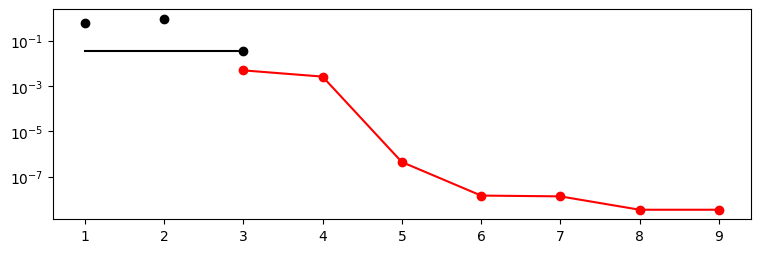

In [25]:
spot_1_GP.plot_progress(log_y=True)

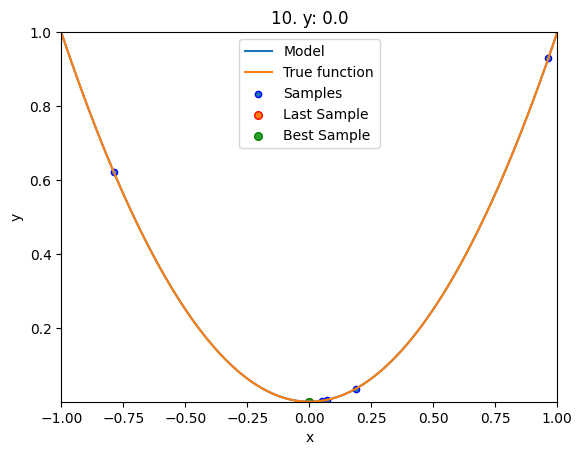

In [26]:
spot_1_GP.plot_model()

# Exercises

* Important:
    * Results from these exercises should be added to this document, i.e., you should submit an updated version of this notebook.
    * Please combine your results using this notebook.
    * Only one notebook from each group!
    * Presentation is based on this notebook. No addtional slides are required!
    * spotPython version `0.16.11` (or greater) is required (see http://www.gm.fh-koeln.de/~bartz/site/download/)

## Exercise 1

* Each team member should choose one of the following surrogates and repeat the experiments from Example 2 and Example 4.
* Please add your name to the section title!

### 1. `DecisionTreeRegressor`

* Describe the surrogate model.
* Use the surrogate as the model for optimization.

### 2. `RandomForestRegressor`

* Describe the surrogate model.
* Use the surrogate as the model for optimization.

### 3.`linear_model.LinearRegression` 

* Describe the surrogate model.
* Use the surrogate as the model for optimization.

### 4. `linear_model.Ridge`

* Describe the surrogate model.
* Use the surrogate as the model for optimization.

## Exercise 2

* (All group members): Compare the performance of the 5 different surrogates on both objective functions:
    * `spotPython`'s internal Kriging
    * `DecisionTreeRegressor`
    * `RandomForestRegressor`
    * `linear_model.LinearRegression`
    * `linear_model.Ridge`

## Solutions

### 1. `DecisionTreeRegressor`

#### 1.1. Branin


#### 1.2. Sphere

### 2. `RandomForestRegressor`

#### 2.1 Branin

#### 2.2 Sphere

### 3. `linear_model.LinearRegression`

#### 3.1 Branin

#### 3.2 Sphere

### 4. `linear_model.Ridge`

#### 4.1 Branin

#### 4.2 Sphere